In [87]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from scipy.signal import savgol_filter
import warnings
warnings.filterwarnings('ignore')

In [88]:
hacktrain = pd.read_csv(r"D:\ML\Summer Analytics\Week 2 Assignment\Hackathon\hacktrain.csv")
hacktrain.head()

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [89]:
hacktrain.isnull().sum()

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

In [90]:
hacktrain.dtypes

Unnamed: 0      int64
ID              int64
class          object
20150720_N    float64
20150602_N    float64
20150517_N    float64
20150501_N    float64
20150415_N    float64
20150330_N    float64
20150314_N    float64
20150226_N    float64
20150210_N    float64
20150125_N    float64
20150109_N    float64
20141117_N    float64
20141101_N    float64
20141016_N    float64
20140930_N    float64
20140813_N    float64
20140626_N    float64
20140610_N    float64
20140525_N    float64
20140509_N    float64
20140423_N    float64
20140407_N    float64
20140322_N    float64
20140218_N    float64
20140202_N    float64
20140117_N    float64
20140101_N    float64
dtype: object

In [91]:
hacktrain.fillna(hacktrain.mean(numeric_only=True), inplace=True)
hacktrain.isnull().sum()

Unnamed: 0    0
ID            0
class         0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64

In [92]:
hacktest = pd.read_csv(r"D:\ML\Summer Analytics\Week 2 Assignment\Hackathon\hacktest.csv")
hacktest.shape
hacktest

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,7466.4200,413.162,5761.000,5625.45,489.4030,3923.84,3097.110,6766.42000,...,801.184,927.115,4704.14,6378.42,340.949,2695.5700,527.268,4736.75,601.843,6639.760
1,1,2,7235.2600,6037.350,1027.560,6085.14,1618.0500,6668.54,2513.990,1051.69000,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.1400,3298.110,6942.68,1070.440,842.101
2,2,3,7425.0800,6969.980,1177.940,7408.93,861.0610,7644.43,814.458,1504.29000,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.9900,2206.100,6928.93,1036.560,831.441
3,3,4,7119.1200,1731.620,6311.930,6441.61,465.9790,7128.42,1649.120,6935.22000,...,959.344,5794.150,1045.57,5572.90,586.287,685.9060,1287.000,6734.72,824.584,6883.610
4,4,5,7519.5500,8130.260,1482.540,7879.53,1001.2100,7937.60,4122.530,1094.51000,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.5200,3283.940,7937.68,1857.800,1336.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,2840,2841,-1673.7400,-2514.480,-2451.190,-2738.44,64.4464,-2275.03,-2881.100,-4738.97000,...,-2257.890,-2582.420,-1699.10,-2295.30,306.483,209.4030,221.920,-4885.15,-2630.590,356.233
2841,2841,2842,-96.8233,-412.727,-1795.400,-2363.82,-2168.1900,-2162.68,-3155.740,-4416.11000,...,-3991.910,-2614.910,-2109.84,-2687.18,-2853.890,71.3402,-86.414,-5109.01,324.637,-4316.580
2842,2842,2843,-2364.6000,-155.592,-1422.090,-1713.40,465.6220,-2230.40,-3088.730,-5010.32000,...,-2484.500,-1756.080,-3820.43,-1988.23,433.852,291.8000,254.548,-4259.30,412.115,-1170.750
2843,2843,2844,-3004.6300,-1217.120,180.122,-1113.89,438.4180,-2442.51,-3210.560,-3237.74000,...,-3291.490,-2018.450,-3472.65,-3109.07,511.792,369.0970,276.948,-5574.51,298.739,460.419


In [93]:
# Encode class column (if it's categorical)
label_encoder = LabelEncoder()
hacktrain['class'] = label_encoder.fit_transform(hacktrain['class'])

# Check if target 'class' has missing values
print("Missing values in y (target):", hacktrain['class'].isnull().sum())

# Split into features and target
X = hacktrain.drop(columns=['class'])
y = hacktrain['class']

# Check for missing values in X (features)
print("Missing values in X (features):", X.isnull().sum().sum())  # Total missing values in features

# Impute missing values in the feature set (X) with mean strategy
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit multinomial logistic regression (no need to specify multi_class)
model = LogisticRegression(
    solver='lbfgs',  # Use the 'lbfgs' solver
    max_iter=200,  # Increased max_iter to ensure convergence
    verbose=1  # Show convergence information
)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Classification report with all original class labels
print(classification_report(
    y_test,
    y_pred,
    target_names=label_encoder.classes_  # Directly pass the original class labels
))

Missing values in y (target): 0
Missing values in X (features): 0
              precision    recall  f1-score   support

        farm       0.86      0.88      0.87       168
      forest       1.00      1.00      1.00      1232
       grass       0.83      0.64      0.72        39
  impervious       0.82      0.89      0.85       134
     orchard       1.00      0.50      0.67         6
       water       0.89      0.81      0.85        21

    accuracy                           0.96      1600
   macro avg       0.90      0.79      0.83      1600
weighted avg       0.96      0.96      0.96      1600



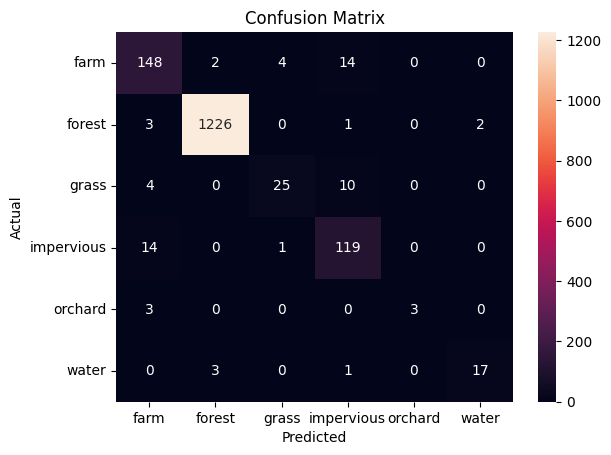

In [94]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Comprehensive NDVI time series preprocessing for land cover classification

In [95]:
class NDVIPreprocessor:
    
    def __init__(self):
        self.scaler = StandardScaler()
        self.imputer = None

    def handle_missing_values(self, X, method='interpolate'):
        X_processed = X.copy()

        if method == 'interpolate':
            df_temp = pd.DataFrame(X_processed)
            X_processed = df_temp.interpolate(method='linear', axis=1).values

        elif method == 'forward_fill':
            df_temp = pd.DataFrame(X_processed)
            X_processed = df_temp.fillna(method='ffill', axis=1).values

        elif method == 'backward_fill':
            df_temp = pd.DataFrame(X_processed)
            X_processed = df_temp.fillna(method='bfill', axis=1).values

        elif method in ['mean', 'median']:
            self.imputer = SimpleImputer(strategy=method)
            X_processed = self.imputer.fit_transform(X_processed)

        for col in range(X_processed.shape[1]):
            col_data = X_processed[:, col]
            if np.isnan(col_data).any():
                col_mean = np.nanmean(col_data)
                X_processed[:, col] = np.where(np.isnan(col_data), col_mean, col_data)

        return X_processed
    
    @staticmethod
    def compute_ndvi(nir, red):
        nir = np.array(nir)
        red = np.array(red)
        denominator = nir + red
        denominator = np.where(denominator == 0, 1e-6, denominator)
        ndvi = (nir - red) / denominator
        return ndvi

    # Apply Savitzky-Golay filter for noise reduction
    def apply_savgol_filter(self, X, window_length=5, polyorder=2):
        X_filtered = np.zeros_like(X)
        for i in range(X.shape[0]):
            wlen = min(window_length, X.shape[1])
            if polyorder >= wlen:
                polyorder = wlen - 1
            if wlen % 2 == 0:
                wlen -= 1
            if wlen < 3:
                wlen = 3
            X_filtered[i, :] = savgol_filter(X[i, :], wlen, polyorder)

        return X_filtered

    def apply_moving_average(self, X, window=3):
        X_smoothed = np.zeros_like(X)
        for i in range(X.shape[0]):
            series = pd.Series(X[i, :])
            X_smoothed[i, :] = series.rolling(window=window, center=True, min_periods=1).mean().values
        return X_smoothed

    def create_temporal_features(self, X):
        features = []
        # Statistical features
        features.append(np.mean(X, axis=1))  # Mean NDVI
        features.append(np.std(X, axis=1))   # Standard deviation
        features.append(np.max(X, axis=1))   # Maximum NDVI
        features.append(np.min(X, axis=1))   # Minimum NDVI
        features.append(np.max(X, axis=1) - np.min(X, axis=1))  # Range

        # Percentiles
        features.append(np.percentile(X, 25, axis=1))  # 25th percentile
        features.append(np.percentile(X, 75, axis=1))  # 75th percentile

        # Trend features
        trends = []
        for i in range(X.shape[0]):
            x_vals = np.arange(X.shape[1])
            slope, _ = np.polyfit(x_vals, X[i, :], 1)
            trends.append(slope)
        features.append(np.array(trends))

        # Seasonal features (quarterly means)
        quarter_size = X.shape[1] // 4
        for q in range(4):
            start_idx = q * quarter_size
            end_idx = (q + 1) * quarter_size if q < 3 else X.shape[1]
            quarter_mean = np.mean(X[:, start_idx:end_idx], axis=1)
            features.append(quarter_mean)

        return np.column_stack(features)

    def create_lag_features(self, X, lags=[1, 2]):
        lag_features = []
        for lag in lags:
            lagged = np.roll(X, lag, axis=1)
            for i in range(X.shape[0]):
                series_mean = np.mean(X[i, :])
                lagged[i, :lag] = series_mean
            lag_features.append(lagged)

        return np.concatenate(lag_features, axis=1)

    # Complete preprocessing pipeline
    def preprocess_pipeline(self, X, include_original=True, include_temporal=True, include_lags=True, smoothing_method='savgol', verbose=False):
        if verbose:
            print("Starting preprocessing pipeline...")

        # Step 1: Handle missing values
        X_clean = self.handle_missing_values(X, method='interpolate')

        # Step 2: Apply smoothing
        if smoothing_method == 'savgol':
            X_smooth = self.apply_savgol_filter(X_clean)
        elif smoothing_method == 'moving_average':
            X_smooth = self.apply_moving_average(X_clean)
        else:
            X_smooth = X_clean

        # Combine features
        feature_sets = []
        if include_original:
            feature_sets.append(X_smooth)
        if include_temporal:
            temporal_features = self.create_temporal_features(X_smooth)
            feature_sets.append(temporal_features)
        if include_lags:
            lag_features = self.create_lag_features(X_smooth, lags=[1, 2])
            feature_sets.append(lag_features)

        # Combine all features
        X_processed = np.concatenate(feature_sets, axis=1)

        # Step 3: Scale features
        X_scaled = self.scaler.fit_transform(X_processed)
        if verbose:
            print(f"Preprocessing complete! Original shape: {X.shape}, Final shape: {X_scaled.shape}")

        return X_scaled

Logistic Regression classifier for NDVI-based land cover classification

In [96]:
class NDVILandCoverClassifier:

    def __init__(self, multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight='balanced', random_state=42):
        self.model = LogisticRegression(
            multi_class=multi_class,
            solver=solver,
            max_iter=max_iter,
            class_weight=class_weight,
            random_state=random_state
        )
        self.preprocessor = NDVIPreprocessor()
        self.is_fitted = False
        self.classes = None

    def fit(self, X, y, preprocess_params=None, verbose=False):
        if preprocess_params is None:
            preprocess_params = {
                'include_original': True,
                'include_temporal': True,
                'include_lags': True,
                'smoothing_method': 'savgol',
                'verbose': verbose
            }
        X_processed = self.preprocessor.preprocess_pipeline(X, **preprocess_params)

        self.model.fit(X_processed, y)
        self.is_fitted = True
        self.classes = self.model.classes_
        return self

    def predict(self, X):
        if not self.is_fitted:
            raise ValueError("Model must be fitted before making predictions")
        X_processed = self.preprocessor.preprocess_pipeline(X)
        return self.model.predict(X_processed)

    def predict_proba(self, X):
        if not self.is_fitted:
            raise ValueError("Model must be fitted before making predictions")

        X_processed = self.preprocessor.preprocess_pipeline(X)
        return self.model.predict_proba(X_processed)

    def get_feature_importance(self):
        if not self.is_fitted:
            raise ValueError("Model must be fitted before getting feature importance")

        coef_abs = np.abs(self.model.coef_)
        feature_importance = np.mean(coef_abs, axis=0)

        return feature_importance

Comprehensive model evaluation using stratified cross-validation

In [97]:

def evaluate_model(X, y, n_splits=5, verbose=True):
    
    if verbose:
        print(f"Performing stratified cross-validation with {n_splits} splits...")

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_scores = []
    fold_reports = []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        if verbose:
            print(f"Processing fold {fold + 1}/{n_splits}...")

        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        classifier = NDVILandCoverClassifier()
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        fold_scores.append(accuracy)

        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        fold_reports.append(report)

        if verbose:
            print(f"Fold {fold + 1} accuracy: {accuracy:.4f}")

    return fold_scores, fold_reports

In [98]:
def main_pipeline(data_path=None, X=None, y=None):

    if data_path is not None:
        print(f"Loading data from {data_path}...")
        df = pd.read_csv(data_path)

        ndvi_columns = [col for col in df.columns if col.endswith('_N')]
        X = df[ndvi_columns].values
        y = df['class'].values

    elif X is None or y is None:
        raise ValueError("Either provide data_path or both X and y")

    print(f"Dataset shape: {X.shape}")
    print(f"Classes: {np.unique(y)}")
    print(f"Missing values: {np.isnan(X).sum()}")

    cv_scores, cv_reports = evaluate_model(X, y, n_splits=5,verbose=True)

    print(f"\n{'='*100}")
    print("CROSS-VALIDATION RESULTS")
    print(f"{'='*100}")
    print(f"Mean Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
    print(f"Individual Fold Scores: {[f'{score:.4f}' for score in cv_scores]}")

    print(f"\n{'='*100}")
    print("TRAINING FINAL MODEL")
    print(f"{'='*100}")

    final_classifier = NDVILandCoverClassifier()
    final_classifier.fit(X, y, verbose=True)

    feature_importance = final_classifier.get_feature_importance()
    top_features_idx = np.argsort(feature_importance)[-10:][::-1]

    print(f"\nTop 10 Most Important Features:")
    for i, idx in enumerate(top_features_idx):
        print(f"{i+1:2d}. Feature {idx:2d}: {feature_importance[idx]:.4f}")

    return final_classifier, cv_scores, feature_importance

In [99]:
if __name__ == "__main__":
    # Train the model
    final_model, scores, importance = main_pipeline(X=X_ndvi, y=y_encoded)

    test_ids = hacktest["ID"].values
    ndvi_cols = [col for col in hacktrain.columns if col.endswith('_N') and col in hacktest.columns]
    X_ndvi = hacktrain[ndvi_cols].values
    X_test_ndvi = hacktest[ndvi_cols].values

    # Fit label encoder on the correct class names manually
    class_names = ["Water", "Impervious", "Farm", "Forest", "Grass", "Orchard"]
    label_encoder = LabelEncoder()
    label_encoder.fit([cls.lower() for cls in class_names])  # lowercase from the beginning

    # Then decode predictions
    pred_encoded = final_model.predict(X_test_ndvi)
    pred_labels = label_encoder.inverse_transform(pred_encoded)

    classes, counts = np.unique(pred_labels, return_counts=True)
    print("Predicted class distribution:")
    for cls, count in zip(classes, counts):
        print(f"{cls}: {count}")

    # Save predictions
    def save_submission(ids, predictions, filename="submission.csv"):
        submission_df = hacktest[["ID"]].merge(
            pd.DataFrame({"ID": test_ids, "class": pred_labels}),
            on="ID", how="left"
        )
        submission_df.to_csv("submission.csv", index=False)
        submission_df.to_csv(filename, index=False)
        print(f"Submission saved to {filename}")

    save_submission(test_ids, pred_labels, filename="submission.csv")

Dataset shape: (8000, 27)
Classes: [0 1 2 3 4 5]
Missing values: 0
Performing stratified cross-validation with 5 splits...
Processing fold 1/5...
Fold 1 accuracy: 0.7394
Processing fold 2/5...
Fold 2 accuracy: 0.7500
Processing fold 3/5...
Fold 3 accuracy: 0.7644
Processing fold 4/5...
Fold 4 accuracy: 0.7506
Processing fold 5/5...
Fold 5 accuracy: 0.7406

CROSS-VALIDATION RESULTS
Mean Accuracy: 0.7490 ± 0.0090
Individual Fold Scores: ['0.7394', '0.7500', '0.7644', '0.7506', '0.7406']

TRAINING FINAL MODEL
Starting preprocessing pipeline...
Preprocessing complete! Original shape: (8000, 27), Final shape: (8000, 93)

Top 10 Most Important Features:
 1. Feature 33: 1.0735
 2. Feature 28: 1.0349
 3. Feature 13: 0.8161
 4. Feature 53: 0.8161
 5. Feature 81: 0.8161
 6. Feature 73: 0.6989
 7. Feature 45: 0.6989
 8. Feature  5: 0.6989
 9. Feature 30: 0.6633
10. Feature 50: 0.5973
Predicted class distribution:
farm: 470
forest: 1527
grass: 260
impervious: 337
orchard: 125
water: 126
Submission